<a href="https://colab.research.google.com/github/TissaMaria/6thSem-ML-Lab/blob/main/1BM22CS309_Lab7_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('iris.csv')

X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with default n_estimators (10): {default_accuracy}")


best_n_estimators = 10
best_accuracy = default_accuracy

for n_estimators in range(1, 101):
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f"Best accuracy: {best_accuracy} achieved with n_estimators: {best_n_estimators}")


Accuracy with default n_estimators (10): 1.0
Best accuracy: 1.0 achieved with n_estimators: 10


In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score

best_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
best_rf_classifier.fit(X_train, y_train)
best_y_pred = best_rf_classifier.predict(X_test)

precision = precision_score(y_test, best_y_pred, average='weighted')
recall = recall_score(y_test, best_y_pred, average='weighted')
f1 = f1_score(y_test, best_y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Precision: 1.0
Recall: 1.0
F1-score: 1.0


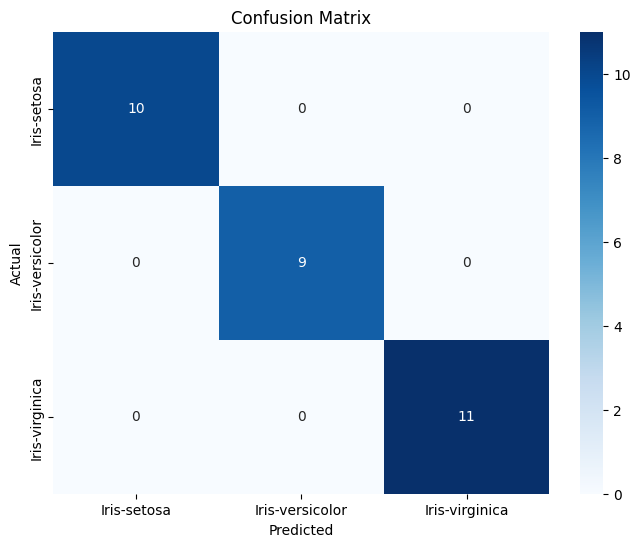

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, best_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data['species'].unique(),
            yticklabels=data['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()